<a href="https://colab.research.google.com/github/girisiman/Deep_Learning_Tasks/blob/master/AutoEncoder1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras.datasets.mnist as mnist
import keras
from keras.layers import Input
from keras.layers.core import Dense, Dropout
from keras.models import Model
from keras import optimizers
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from keras.wrappers.scikit_learn import  KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import os
from sklearn.metrics import accuracy_score


In [0]:
def load_data():
  (x_train, y_train),  (x_test, y_test) = mnist.load_data()
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
  x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
  print(x_train.shape)
  print(x_test.shape)
  
  return x_train, x_test

  
  

In [43]:
x_train, x_test = load_data()

(60000, 784)
(10000, 784)


In [0]:
def add_noise(x_train, x_test):
  noise_factor = 0.5
  x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
  x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
  x_train_noisy = np.clip(x_train_noisy, 0., 1.)
  x_test_noisy = np.clip(x_test_noisy, 0., 1.)
  return x_train_noisy, x_test_noisy


In [0]:
x_train_noise, x_test_noise = add_noise(x_train, x_test)

In [0]:
def create_model(activation = 'relu', optimizer='adadelta', regularizer = regularizers.l1(10e-5), loss='binary_crossentropy' ):
  input_img = Input(shape = (784,))
  encoded = Dense(128, activation=activation)(input_img)
  encoded = Dense(64, activation=activation)(encoded)
  encoded = Dense(32, activation=activation)(encoded)
  
  decoded = Dense(64, activation=activation)(encoded)
  decoded = Dense(128, activation=activation)(decoded)
  # last decoded layer
  decoded = Dense(784, activation='sigmoid')(decoded)
  
  autoencoder = Model(input_img, decoded)
  autoencoder.compile(optimizer=optimizer, loss=loss)
  
  return autoencoder

  

  

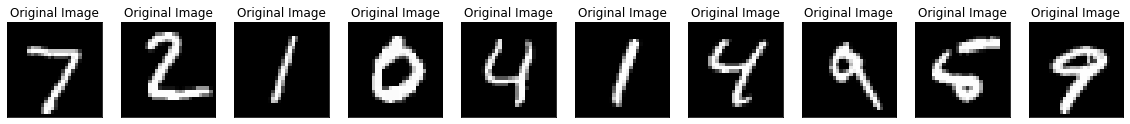

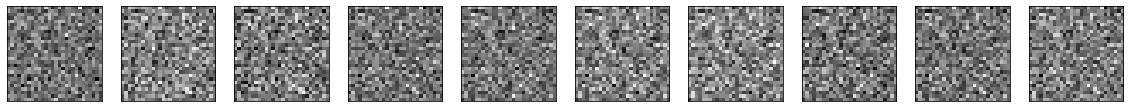

Text(0.5, 1.0, 'Recon')

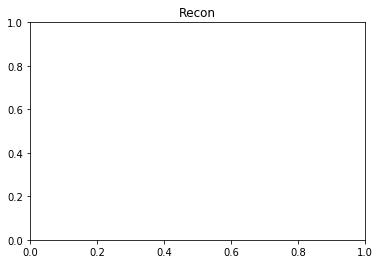

In [63]:
import matplotlib.pyplot as plt

def image_plot_test(x_test):
  n = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original Image')
  plt.show()

def image_plot_recon(pred_image):
  # display reconstruction
  n = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('ReconstructedImage')
  plt.show()
  

  
ae_model = create_model()
predicted_images = ae_model.predict(x_test)
orig_image = image_plot_test(x_test)
recon_image = image_plot_recon(predicted_images)





Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 6s 98us/step - loss: 0.3478 - val_loss: 0.2623
Epoch 2/2
60000/60000 [==============================] - 3s 55us/step - loss: 0.2521 - val_loss: 0.2418


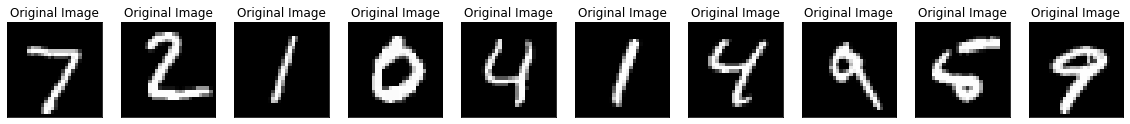

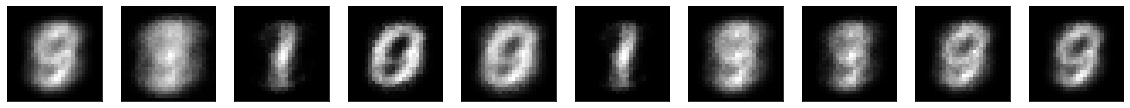

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 62us/step - loss: 0.5639 - val_loss: 0.5590
Epoch 2/2
60000/60000 [==============================] - 4s 61us/step - loss: 0.5579 - val_loss: 0.5569


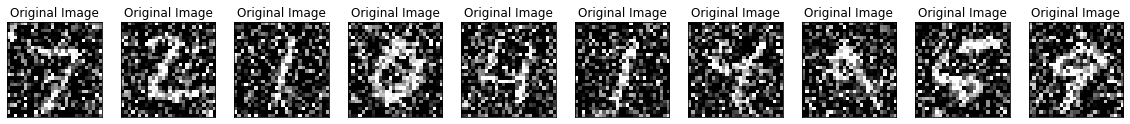

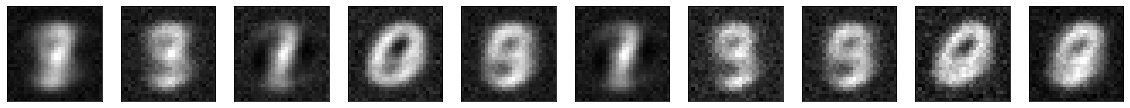

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 57us/step - loss: 0.2287 - val_loss: 0.2189
Epoch 2/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.2111 - val_loss: 0.2014


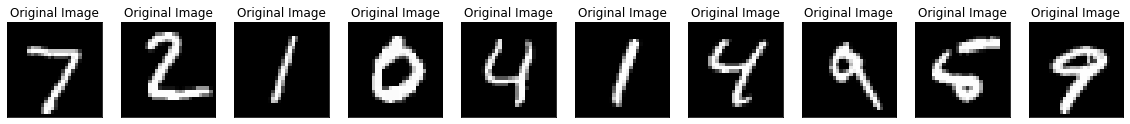

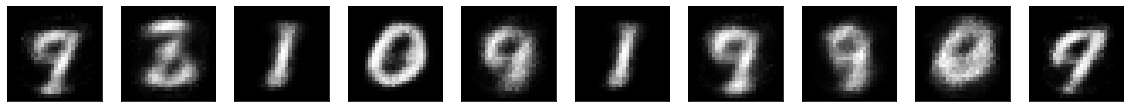

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 60us/step - loss: 0.5534 - val_loss: 0.5499
Epoch 2/2
60000/60000 [==============================] - 3s 42us/step - loss: 0.5492 - val_loss: 0.5483


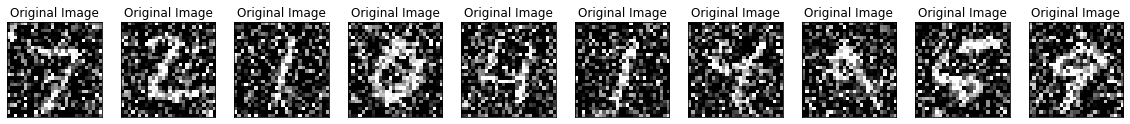

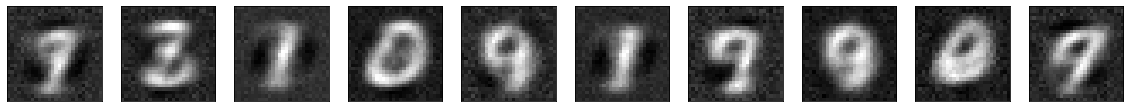

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.1970 - val_loss: 0.1924
Epoch 2/2
60000/60000 [==============================] - 2s 36us/step - loss: 0.1884 - val_loss: 0.1839


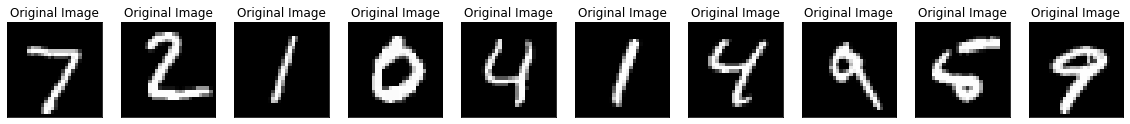

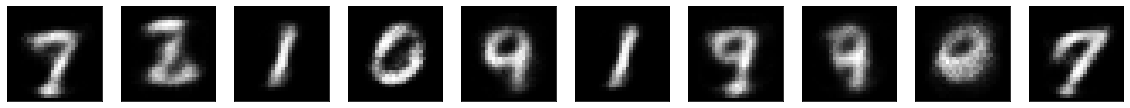

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 42us/step - loss: 0.5485 - val_loss: 0.5458
Epoch 2/2
60000/60000 [==============================] - 3s 51us/step - loss: 0.5451 - val_loss: 0.5445


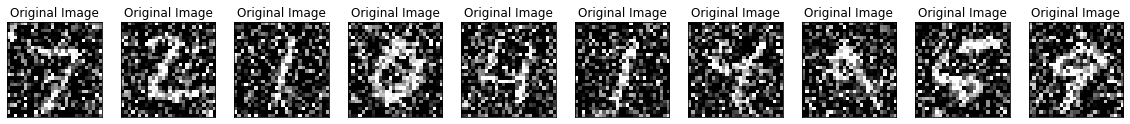

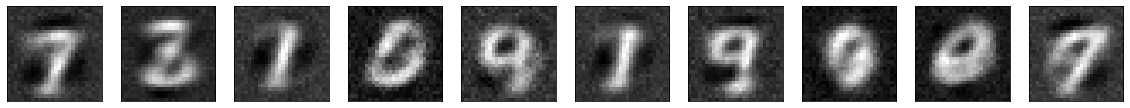

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 55us/step - loss: 0.1812 - val_loss: 0.1733
Epoch 2/2
60000/60000 [==============================] - 3s 55us/step - loss: 0.1722 - val_loss: 0.1674


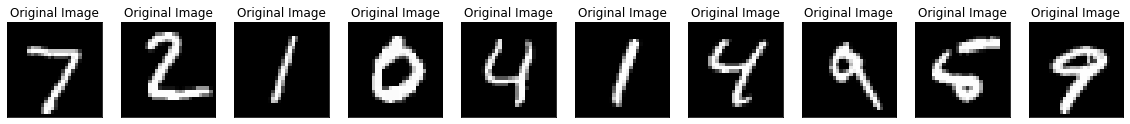

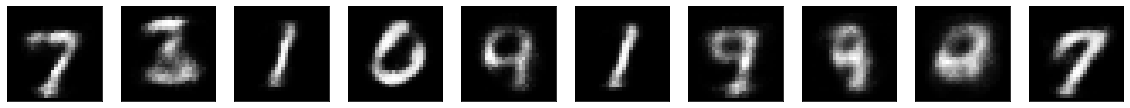

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 61us/step - loss: 0.5443 - val_loss: 0.5420
Epoch 2/2
60000/60000 [==============================] - 4s 62us/step - loss: 0.5412 - val_loss: 0.5397


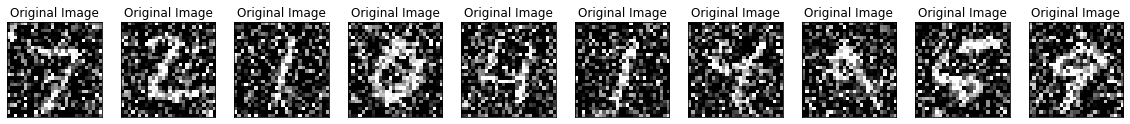

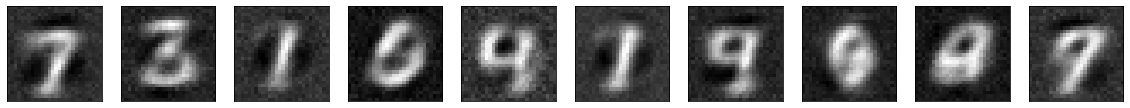

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.1679 - val_loss: 0.1618
Epoch 2/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.1616 - val_loss: 0.1571


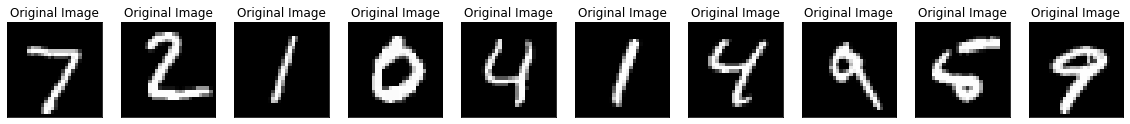

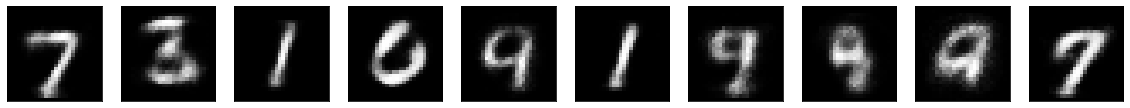

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.5413 - val_loss: 0.5395
Epoch 2/2
60000/60000 [==============================] - 3s 49us/step - loss: 0.5386 - val_loss: 0.5377


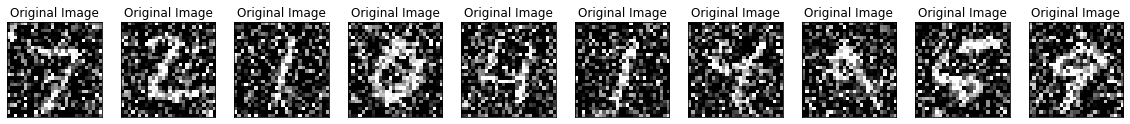

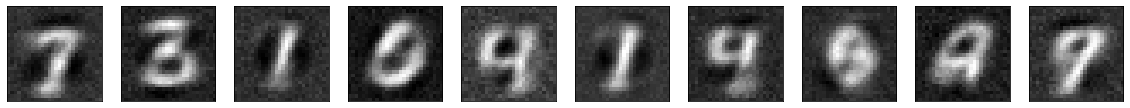

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 39us/step - loss: 0.1596 - val_loss: 0.1544
Epoch 2/2
60000/60000 [==============================] - 2s 37us/step - loss: 0.1545 - val_loss: 0.1524


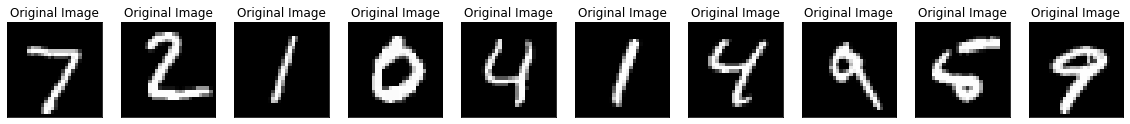

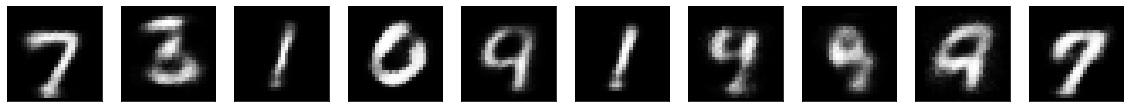

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 47us/step - loss: 0.5389 - val_loss: 0.5373
Epoch 2/2
60000/60000 [==============================] - 3s 55us/step - loss: 0.5367 - val_loss: 0.5361


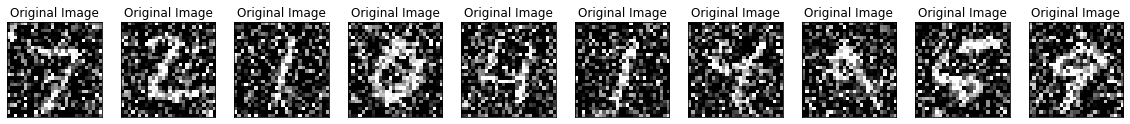

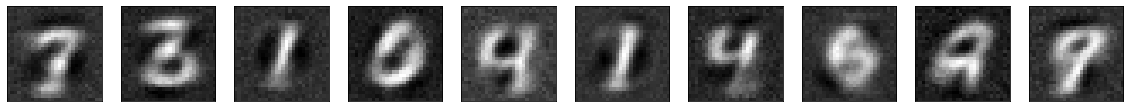

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 51us/step - loss: 0.1536 - val_loss: 0.1485
Epoch 2/2
60000/60000 [==============================] - 3s 51us/step - loss: 0.1491 - val_loss: 0.1467


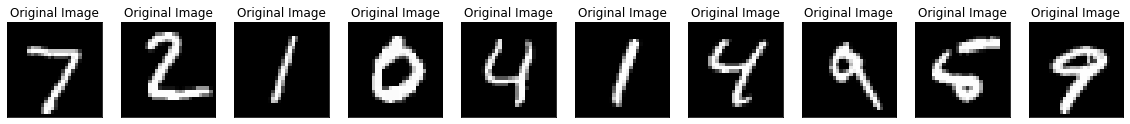

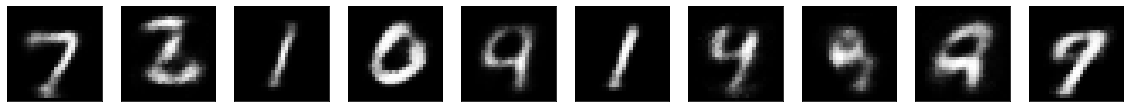

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 57us/step - loss: 0.5371 - val_loss: 0.5358
Epoch 2/2
60000/60000 [==============================] - 3s 56us/step - loss: 0.5350 - val_loss: 0.5338


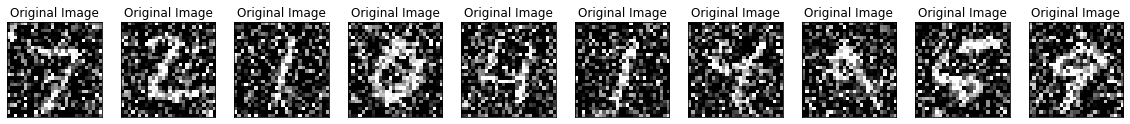

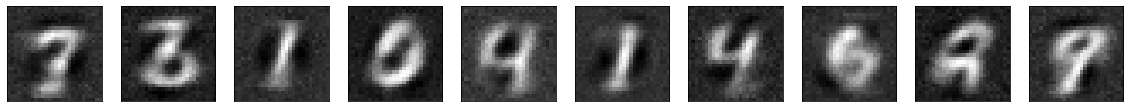

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 52us/step - loss: 0.1485 - val_loss: 0.1474
Epoch 2/2
60000/60000 [==============================] - 2s 41us/step - loss: 0.1442 - val_loss: 0.1411


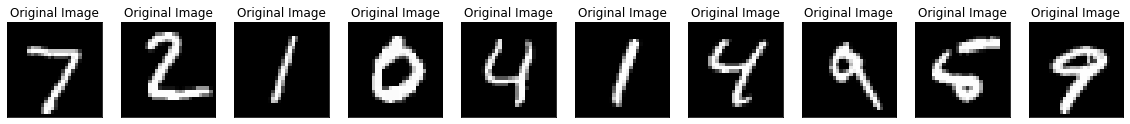

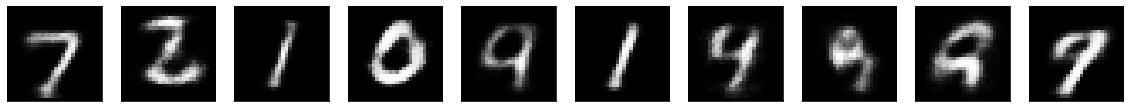

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 50us/step - loss: 0.5355 - val_loss: 0.5338
Epoch 2/2
60000/60000 [==============================] - 3s 42us/step - loss: 0.5336 - val_loss: 0.5324


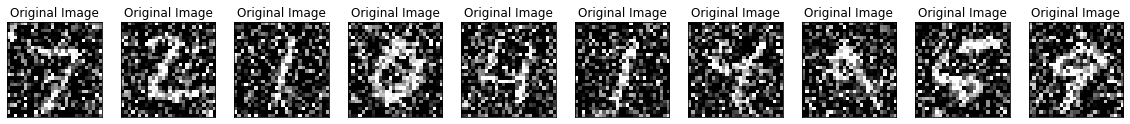

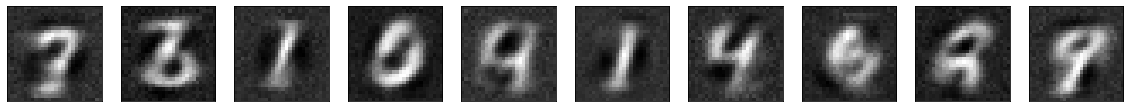

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 37us/step - loss: 0.1443 - val_loss: 0.1399
Epoch 2/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.1401 - val_loss: 0.1357


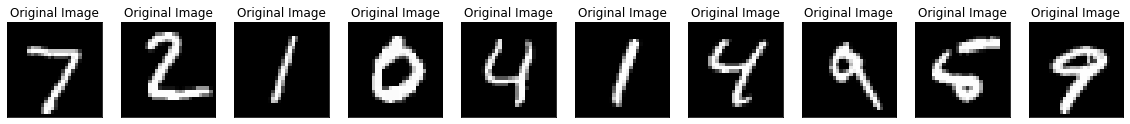

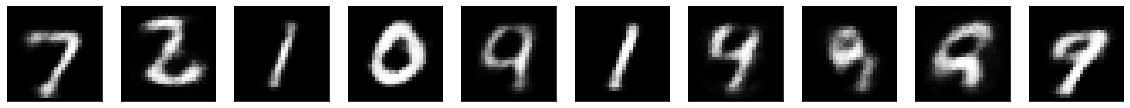

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 57us/step - loss: 0.5342 - val_loss: 0.5324
Epoch 2/2
60000/60000 [==============================] - 4s 58us/step - loss: 0.5324 - val_loss: 0.5316


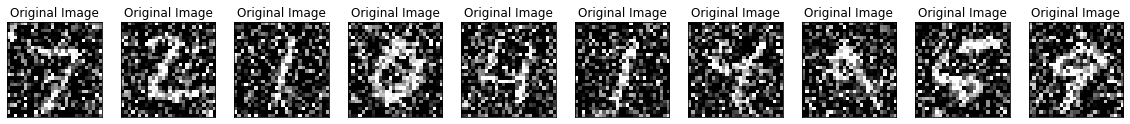

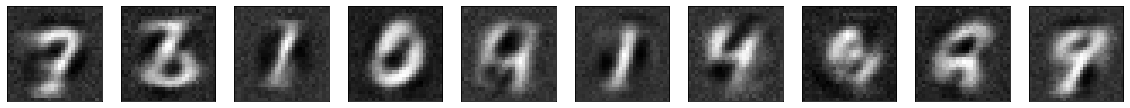

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 53us/step - loss: 0.1405 - val_loss: 0.1370
Epoch 2/2
60000/60000 [==============================] - 3s 53us/step - loss: 0.1364 - val_loss: 0.1348


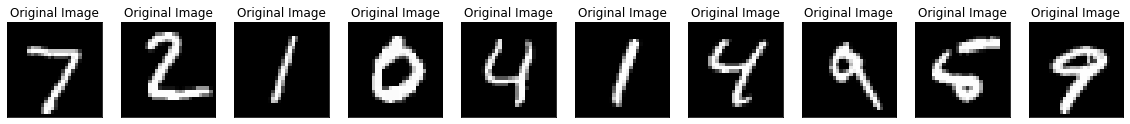

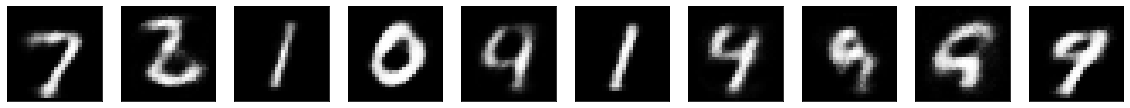

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 57us/step - loss: 0.5331 - val_loss: 0.5318
Epoch 2/2
60000/60000 [==============================] - 3s 56us/step - loss: 0.5314 - val_loss: 0.5308


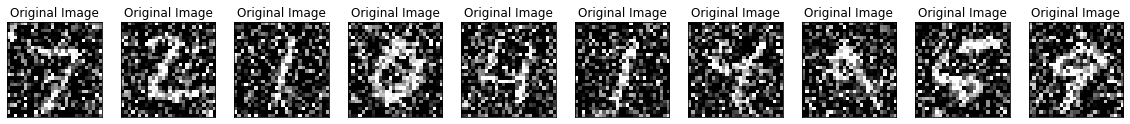

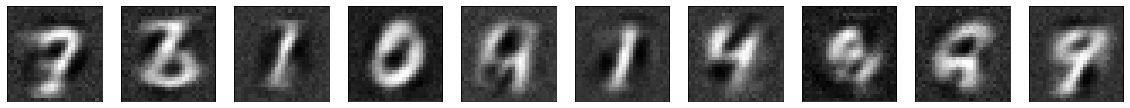

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.1373 - val_loss: 0.1328
Epoch 2/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.1336 - val_loss: 0.1310


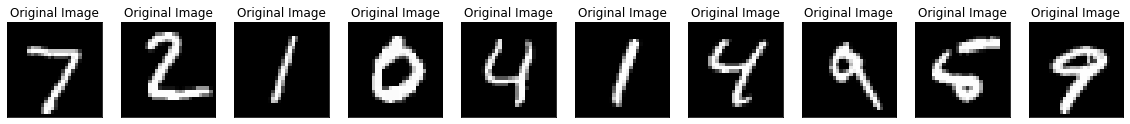

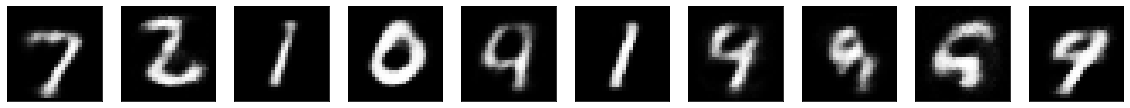

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.5321 - val_loss: 0.5308
Epoch 2/2
60000/60000 [==============================] - 3s 43us/step - loss: 0.5305 - val_loss: 0.5294


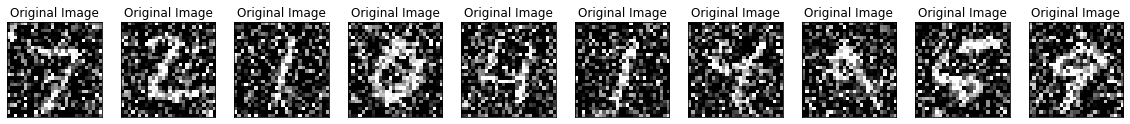

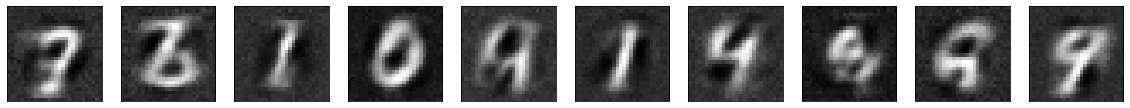

Without the addition of  noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.1346 - val_loss: 0.1308
Epoch 2/2
60000/60000 [==============================] - 3s 54us/step - loss: 0.1309 - val_loss: 0.1282


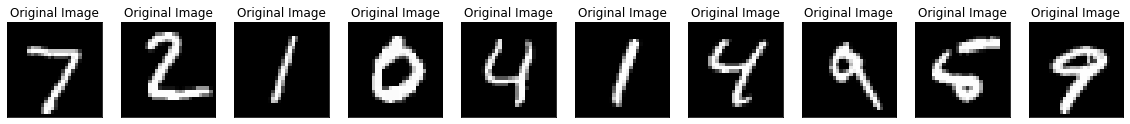

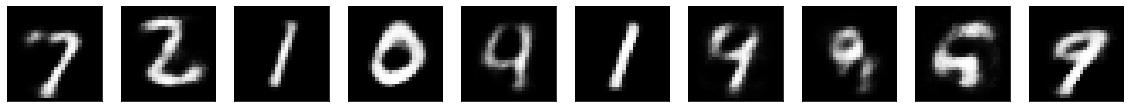

With the addition of noise
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 3s 58us/step - loss: 0.5313 - val_loss: 0.5298
Epoch 2/2
60000/60000 [==============================] - 3s 58us/step - loss: 0.5296 - val_loss: 0.5297


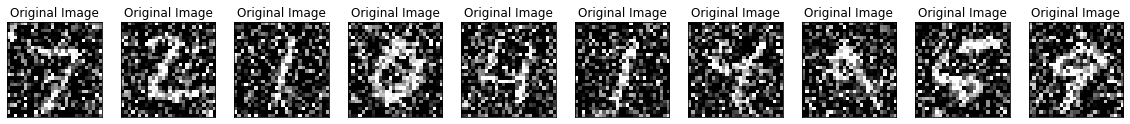

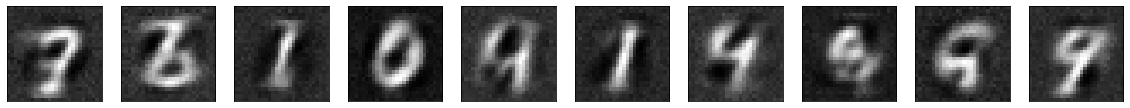

In [69]:

ae_model = create_model()

parameter_combination = {'activation': ['softmax', 'elu',  'relu',],
             'optimizer': ['SGD', 'Adam', ],
             'loss': ['mse','binary_crossentropy']}
for parameter in ParameterGrid(parameter_combination):
  #ae_model.set_params(**parameter)
  history = {}
  print('Without the addition of  noise')
  ae_model.fit(x_train,x_train, epochs = 2, batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
  image_wout_noise = ae_model.predict(x_test)
  image_plot_test(x_test)
  image_plot_recon(image_wout_noise)
  print('With the addition of noise')
  ae_model.fit(x_train_noise,x_train_noise, epochs = 2, batch_size=256,
                shuffle=True,
                validation_data=(x_test_noise, x_test_noise))
  image_with_noise = ae_model.predict(x_test_noise)
  image_plot_test(x_test_noise)
  image_plot_recon(image_with_noise)
  
  
  #pred_image = w_noise.predict(x_test)''''''
  
  #n = 10  # how many digits we will display
  #plt.figure(figsize=(20, 4))
  #for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    #plt.imshow(x_test[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    # display reconstruction
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(pred_image[i].reshape(28, 28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
  #plt.show()


  


In [35]:
print()

dict_keys(['val_loss', 'loss'])


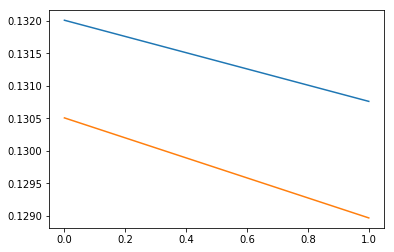

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()